# Unit 02 Project -- ODEs and Curve Fitting

The purpose of this "mini project" is to demonstrate that you can model realistic projectile motion, including drag and Magnus effect for example, and that you can fit a mathematical function to data and use the curve-fit parameters, as needed, in your model.

Your project should:

- clearly define the model that you are investigating.
- use LaTeX to format mathematical equations in your narrative.
- investigate changing parameters or initial conditions in your model.
- validate your model by testing parameters or initial conditions for known outcomes.
- use functions judiciously so you can rerun your model with different parameters or initial conditions.

<div class="alert alert-success">
The mini-project should be of sufficient quality to post to github in your portfolio of work that can be shown to a potential employer.
</div>


## Grading Rubric

Category | Poor (60-70%) | Good (70% - 85%) | Excellent (85%-100%)
:---: | :--- | :--- | :---
**Narrative** | There is very little narrative. Background information is not present or lacks detail. There is no story woven with the code. Mathematical markup is not used. No citations are included. | There is a narrative, but significant parts are missing. The writing does not flow. Sections headings are sparse. Mathematical markup is poor or insufficient. More and better citations are needed. | There is flow, and a clear storyline. Section headings are used to provide an outline. Mathematical markup is used correctly and sufficiently to display mathematics. Citations are sufficient in number and quality.
**Code** | Code is missing or is not functional. Nothing is done to demonstrate that the code is operating correctly. Code is difficult to read. Results are missing or seriously incomplete. Visualization is not included. Units are inconsistent or incorrect. Algorithm is implemented incorrectly or the wrong algorithm chosen. There is significant error. | Code is mostly correct and the implementation or algorithm is a good method to use. Visualization is present, but titles and axes labels need improvement or visualization can be improved. Code is understandable and somewhat commented. Units are mostly consistent and correct.| The code runs flawlessly and is well-organized. The code is easy to read and understand. Units are indicated, consistent, and correct. Visualization is excellent. Techniques and algorithms are well-chosen and correctly implemented. Results are clear and understandable.
**Difficulty** | The difficulty level is not a good match to one's ability. The project is either too difficult or too simple. | The difficulty level is good match to one's ability. | The difficulty is a big challenge, considering one's ablity.

<div class="alert alert-success">
Your project should be in a separate notebook in this repository. You may write VPython programs in a separate `.py` file if this is more effective than including it in the notebook.
</div>

## Project Ideas

If 3D visualization helps, use VPython. But choose 3D visualization, only if it helps you tell the story you want to tell.

### Option 1

Find the angle that gives maximum range for a baseball with a certain launch speed (like 110 mph) and backspin (like 1800 rpm). Then, change the angular speed and find the angle for maximum range again. See what combination of angle and angular speed leads to maximum range, assuming only backspin (no sidespin). Include variable drag coefficient.

### Option 2

Improve our model for Mike Trout's homerun by taking into account wind and temperature (which affects air density). Test your new model with other homeruns by Trout. Does it more accurately predict the range of the homerun compared to our model?

### Option 3

Model a curveball pitch using real data (from [baseballsavant.mlb.com](https://baseballsavant.mlb.com/)).

### Option 4

Model the motion of a golf ball, and reproduce Figure 3.17 of *Computational Modeling and Visualization of Physical Systems* by Jay Wang.

### Option 5

Fit data to a model rocket engine (for thrust vs. time) and use the function in a model of the rocket's motion. Predict its altitude. I can provide data for various engines, and [here is a paper](dooling-thrust-curve.pdf) that describes a 6-parameter function to fit the data.

![c6-5-2.JPG](c6-5-2.JPG)

### Option 6

Model projectiles moving through water, including buoyant force. For example, model the motion of a bubble or a plastic, air-filled projectile.

### Option 7

Write a game like [Paper Toss](https://www.youtube.com/watch?v=YyFG1IxypKU).

### Option 8

Model the motion of frisbee.

### Option 9

Choose your own project that requires curve fitting.

### Option 10

Choose your own project modeling the motion of an object in a fluid. 

As one example, here's a paper on the topic of the Magnus effect at low Reynolds number (i.e. viscous drag dominates over inertial drag). [See this article for references.](https://aip.scitation.org/doi/10.1063/1.5145064)



In [1]:
import ode #ode.py should be in the same folder as your notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
g = 9.8 #N/kg\
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.3 #depends on speed
m = 0.145 #kg
b2 = 1/2*Cd*rho*A #changes as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #will change with S
alpha = 1/2*CL*rho*A*r/S


In [3]:
# data for pitch
vmag0mph = 88 #mph
thetadeg = 2.5 #degx
#alpha = 0.8
spinrate = 2500 #rpm

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

# initial position and velocity components
x0 = .22
y0 = 0
z0 = 1.88
vx0 = 0 #vmag0*np.tan(theta)     #*np.sin(alpha)
vy0 = vmag0*np.cos(theta)     #*np.sin(alpha)
vz0 = vmag0*np.sin(theta) 

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
omega = np.array([-omegamag, 0, 0])

# array for instantaneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0])


In [4]:
def forcesoftheball(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
   
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
   
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
   
    dxdt = vx
    dydt = vy
    dzdt = vz
   
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    Fdragx = -1/2*Cd*rho*A*v**2 * vx/v
    Fdragy = -1/2*Cd*rho*A*v**2 * vy/v
    Fdragz = -1/2*Cd*rho*A*v**2 * vz/v
   
    Fgravz = -m*g
    
    S = (r*omegamag)/v
    CL = 0.62*S**0.7
    
    Fmagnusx =  1/2*CL*rho*((A*r)/S)*((omega[0]*vy)-(omega[1]*vx))
    Fmagnusy =  1/2*CL*rho*((A*r)/S)*((omega[1]*vz)-(omega[2]*vy))
    Fmagnusz =  1/2*CL*rho*((A*r)/S)*((omega[2]*vx)-(omega[0]*vz))
    
    Fnetx = Fdragx + Fmagnusx
    Fnety = Fdragy + Fmagnusy
    Fnetz = Fmagnusz + Fgravz
    
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m   

    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])
   
    return derivs

0.21968071485967727
0.21872492103724614
0.2171356941870589
0.21491608781933078
0.21206913352093032
0.20859784117387145
0.20450519917154228
0.1997941746327049
0.19446771361329912
0.18852874131608371
0.1819801622981472
0.17482486067632044
0.16706570033052212
0.15870552510506833
0.14974715900797636
0.140193406408293
0.13004705223147633
0.11931086215286033
0.1079875827892307
0.09607994188853988
0.08359064851778888
0.07052239324910319
0.056877848344029265
0.042659667936078116
0.027870488211541714
0.012512927588607744
-0.003410413105202326
-0.019896950457247112
-0.03694411829560693
-0.05454936751652932
-0.07271016591345492
-0.09142399800760066
-0.11068836488007758
-0.13050078400552068
-0.15085878908720918
-0.17175992989365518
-0.19320177209663966
-0.21518189711067465
-0.23769790193387125
-0.26074739899019295
-0.2843280159730743
-0.3084373956903857
-0.3330731959107244
-0.3582330892110131


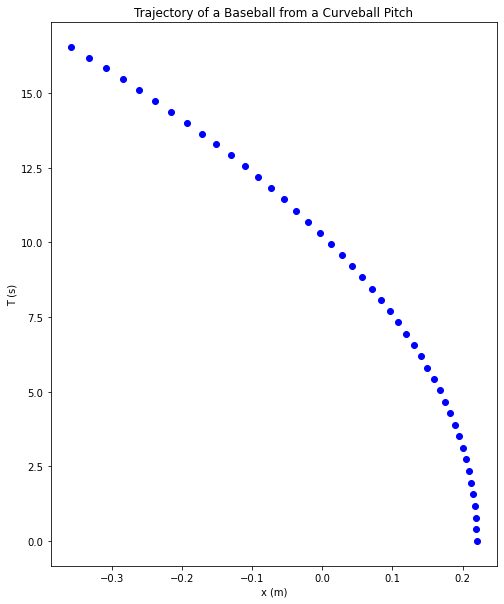

In [5]:
t = 0 #time in s
h = .01 #time step in s

# initial position and velocity components
x = .22
y = 0
z = 1.88
vx = 0 #vmag0*np.tan#(theta)    #*np.sin(alpha)
vy = vmag0*np.cos(theta)    #*np.sin(alpha)
vz = vmag0*np.sin(theta)   

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x)
ylist.append(y)
zlist.append(z)

data = np.array([x,y,z,vx,vy,vz])

# compute
while y < 16.2:
   
    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h
   
    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    print(x)
   
# Plot the trajectory
plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()
